<a href="https://colab.research.google.com/github/stuned/Mestrado/blob/main/XGBoost_Tweets_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xgboost

In [2]:
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 1.9 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
base_filmes = pd.read_csv ('/content/drive/MyDrive/Mestrado/mestrado - base de dados/movies_full_info_merged.csv', dtype = {'index': str, 'filename': str, 'count_valid_tweets': int, 'reply_count': int, 'retweet_count': int, 'like_count': int, 'quote_count': int, 'anger': float, 'anticipation': float, 'disgust': float, 'fear': float, 'joy': float, 'love': float, 'optimism': float, 'pessimism': float, 'sadness': float, 'surprise': float, 'trust': float, 'negative': float, 'neutral': float, 'positive': float, 'FILME': str, 'ANO': int, 'REL_MONTH_NAME': str, 'REL_MONTH': int, 'REL_DAY': int, 'REL_YEAR': int, 'MARKETS': str, 'DISTRIBUTOR_GROUPED': bool, 'DISTRIBUTOR': str, 'GENRE': str, 'Drama': bool, 'Action': bool, 'Comedy': bool, 'Horror': bool, 'Adventure': bool, 'Crime': bool, 'Fantasy': bool, 'Biography': bool, 'Documentary': bool, 'Animation': bool, 'Thriller': bool, 'Mystery': bool, 'History': bool, 'Sci-Fi': bool, 'Romance': bool, 'Music': bool, 'Family': bool, 'Western': bool, 'Musical': bool, 'War': bool, 'MPAA': str, 'MPAA_BIN': bool, 'RUNTIME_HOUR': str, 'RUNTIME_MINUTES': str, 'RUNTIME': int, 'ACTOR': str, 'CREW': str, 'SINOPSE': str, 'BUDGET': float, 'DOMESTIC_OPENING': float, 'DOMESTIC_GROSS': float, 'INTERNATIONAL_GROSS': float, 'WORLDWIDE_GROSS': float, 'BUDGET_DEFLACIONADO': float, 'DOMESTIC_OPENING_DEFLACIONADO': float, 'DOMESTIC_GROSS_DEFLACIONADO': float, 'INTERNATIONAL_GROSS_DEFLACIONADO': float, 'WORLDWIDE_GROSS_DEFLACIONADO': float, 'SEQUEL': bool, 'HAVE_SEQUEL': bool, 'IS_SPINOFF': bool, 'SEQUEL_SPINOFF': bool, 'INFO': str},
                                    engine='python',encoding='utf-8', on_bad_lines='skip', index_col=False)

In [6]:
base_filmes_rf =  base_filmes[['count_valid_tweets', 'reply_count', 'retweet_count', 'like_count', 'quote_count', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust', 'negative', 'neutral', 'positive', 'DISTRIBUTOR_GROUPED', 'Drama', 'Action', 'Comedy', 'Horror', 'Adventure', 'Crime', 'Fantasy', 'Biography', 'Documentary', 'Animation', 'Thriller', 'Mystery', 'History', 'Sci-Fi', 'Romance', 'Music', 'Family', 'Western', 'Musical', 'War', 'MPAA_BIN', 'BUDGET_DEFLACIONADO', 'DOMESTIC_OPENING_DEFLACIONADO', 'DOMESTIC_GROSS_DEFLACIONADO', 'INTERNATIONAL_GROSS_DEFLACIONADO', 'WORLDWIDE_GROSS_DEFLACIONADO', 'HAVE_SEQUEL', 'SEQUEL_SPINOFF', 'RUNTIME', 'REL_YEAR', 'REL_MONTH']]

In [7]:
base_filmes.shape

(386, 74)

In [8]:
base_filmes_rf.shape

(386, 51)

In [9]:
base_filmes_rf.head()

,count_valid_tweets,reply_count,retweet_count,like_count,quote_count,anger,anticipation,disgust,fear,joy,...,BUDGET_DEFLACIONADO,DOMESTIC_OPENING_DEFLACIONADO,DOMESTIC_GROSS_DEFLACIONADO,INTERNATIONAL_GROSS_DEFLACIONADO,WORLDWIDE_GROSS_DEFLACIONADO,HAVE_SEQUEL,SEQUEL_SPINOFF,RUNTIME,REL_YEAR,REL_MONTH
0,34152,7137,18987,49807,16,0.030253,0.285267,0.030638,0.067985,0.445574,...,0.0,26317981.0,76719597.0,40586896.0,117306493.0,True,True,103,2016,3
1,29,5,14,22,2,0.038646,0.233765,0.058740,0.489303,0.090981,...,0.0,997.0,5152.0,0.0,5152.0,False,False,85,2019,10
2,533,72,195,68,0,0.036060,0.333602,0.042019,0.105184,0.345716,...,0.0,3805.0,7109.0,0.0,7109.0,False,False,91,2013,6
3,749,81,73,190,0,0.066029,0.227398,0.073734,0.073973,0.325812,...,0.0,9994.0,14903.0,877532.0,892435.0,False,False,93,2014,4
4,1959,113,484,1142,7,0.020444,0.291011,0.028198,0.115785,0.407732,...,0.0,0.0,0.0,17111.0,17111.0,True,True,120,2016,5


In [10]:
base_filmes_rf.tail()

,count_valid_tweets,reply_count,retweet_count,like_count,quote_count,anger,anticipation,disgust,fear,joy,...,BUDGET_DEFLACIONADO,DOMESTIC_OPENING_DEFLACIONADO,DOMESTIC_GROSS_DEFLACIONADO,INTERNATIONAL_GROSS_DEFLACIONADO,WORLDWIDE_GROSS_DEFLACIONADO,HAVE_SEQUEL,SEQUEL_SPINOFF,RUNTIME,REL_YEAR,REL_MONTH
381,12441,6738,15803,116058,2528,0.110069,0.171559,0.088389,0.095887,0.359749,...,20000000.0,71117625.0,175005930.0,80100000.0,255105930.0,False,False,116,2019,3
382,23195,4467,17402,27019,4,0.042608,0.272256,0.041041,0.022116,0.476920,...,0.0,4232490.0,8409395.0,8202204.0,16611599.0,False,False,104,2014,2
383,18,2,2,1,0,0.017707,0.209200,0.030825,0.017051,0.543696,...,38377683.0,22318231.0,72786743.0,55483164.0,128269907.0,False,False,98,2013,1
384,7,0,0,6,0,0.037765,0.198211,0.047191,0.032719,0.494483,...,208335993.0,72820923.0,221888481.0,370232978.0,592121460.0,False,False,116,2013,6
385,6,0,0,2,0,0.052179,0.189661,0.045509,0.168379,0.472248,...,0.0,0.0,0.0,5439.0,5439.0,False,False,82,2014,5


In [11]:
base_filmes_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   count_valid_tweets                386 non-null    int64  
 1   reply_count                       386 non-null    int64  
 2   retweet_count                     386 non-null    int64  
 3   like_count                        386 non-null    int64  
 4   quote_count                       386 non-null    int64  
 5   anger                             386 non-null    float64
 6   anticipation                      386 non-null    float64
 7   disgust                           386 non-null    float64
 8   fear                              386 non-null    float64
 9   joy                               386 non-null    float64
 10  love                              386 non-null    float64
 11  optimism                          386 non-null    float64
 12  pessimis

In [12]:
base_filmes_rf.describe()

,count_valid_tweets,reply_count,retweet_count,like_count,quote_count,anger,anticipation,disgust,fear,joy,...,neutral,positive,BUDGET_DEFLACIONADO,DOMESTIC_OPENING_DEFLACIONADO,DOMESTIC_GROSS_DEFLACIONADO,INTERNATIONAL_GROSS_DEFLACIONADO,WORLDWIDE_GROSS_DEFLACIONADO,RUNTIME,REL_YEAR,REL_MONTH
count,386.000000,386.000000,386.000000,3.860000e+02,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,...,386.000000,386.000000,3.860000e+02,3.860000e+02,3.860000e+02,3.860000e+02,3.860000e+02,386.000000,386.000000,386.000000
mean,11758.888601,3453.800518,10816.608808,3.093259e+04,806.321244,0.060526,0.231551,0.054197,0.128256,0.370371,...,0.516042,0.323754,7.000014e+06,6.694070e+06,1.904722e+07,2.335277e+07,4.240000e+07,99.098446,2014.909326,6.450777
std,48957.030015,14578.212438,45778.359952,1.320501e+05,4908.515752,0.056927,0.100041,0.044355,0.123551,0.147532,...,0.146955,0.134024,2.077017e+07,1.409556e+07,4.155627e+07,5.773811e+07,9.269930e+07,17.258633,4.961626,3.259976
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000348,0.022603,0.000537,0.000412,0.012032,...,0.027100,0.013580,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.380000e+02,24.000000,1982.000000,1.000000
25%,120.500000,18.250000,62.750000,1.357500e+02,0.000000,0.023804,0.162112,0.027624,0.045371,0.268038,...,0.411381,0.235906,0.000000e+00,2.211250e+03,1.036925e+04,0.000000e+00,7.190075e+04,89.000000,2014.000000,4.000000
50%,873.500000,140.500000,516.500000,1.144500e+03,6.000000,0.044972,0.231017,0.045453,0.092554,0.353105,...,0.509872,0.310004,0.000000e+00,2.391750e+04,1.971095e+05,5.917740e+05,1.466974e+06,95.000000,2016.000000,7.000000
75%,4843.000000,1361.000000,3015.500000,8.034000e+03,87.750000,0.078271,0.285876,0.070328,0.168617,0.459506,...,0.623758,0.396693,3.769076e+06,8.462451e+06,2.037269e+07,1.625819e+07,4.237866e+07,105.000000,2018.000000,9.000000
max,666937.000000,201893.000000,610350.000000,1.585020e+06,82158.000000,0.391661,0.710871,0.411003,0.669333,0.915706,...,0.902600,0.969016,2.083360e+08,1.286397e+08,3.427817e+08,3.917264e+08,7.315751e+08,192.000000,2019.000000,12.000000


In [13]:
base_filmes_rf.isnull().sum()

count_valid_tweets                  0
reply_count                         0
retweet_count                       0
like_count                          0
quote_count                         0
anger                               0
anticipation                        0
disgust                             0
fear                                0
joy                                 0
love                                0
optimism                            0
pessimism                           0
sadness                             0
surprise                            0
trust                               0
negative                            0
neutral                             0
positive                            0
DISTRIBUTOR_GROUPED                 0
Drama                               0
Action                              0
Comedy                              0
Horror                              0
Adventure                           0
Crime                               0
Fantasy     

In [14]:
base_filmes_rf['HAVE_SEQUEL'].value_counts()

HAVE_SEQUEL
False    343
True      43
Name: count, dtype: int64

In [15]:
X = base_filmes_rf.drop(['HAVE_SEQUEL'], axis=1)
y = base_filmes_rf['HAVE_SEQUEL']

### **Class distribution**

### **Random Oversampling**

``"not majority"`` = resample all classes but the majority class



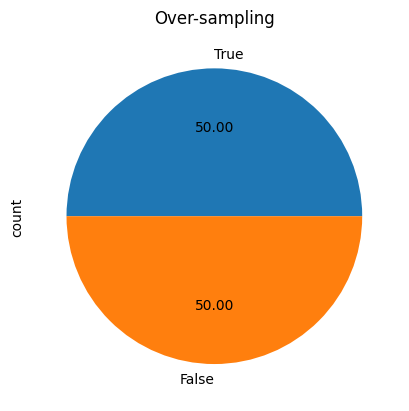

In [16]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state=100)

In [18]:
X_train.shape, X_test.shape

((514, 50), (172, 50))

In [19]:
len(X_test) / len(X_res)

0.25072886297376096

### Criando o objeto com o classificador XGBoost

In [20]:
classificador_xgb = xgb.XGBClassifier()

In [21]:
type(classificador_xgb)

xgboost.sklearn.XGBClassifier

## Compatibilidade com scikit-learn

In [22]:
from sklearn.model_selection import cross_val_score

#Funciona com scikitlearn
resultado_cv = cross_val_score(classificador_xgb, X_train, y_train)

resultado_cv

array([0.96116505, 0.95145631, 0.97087379, 0.98058252, 0.96078431])

In [23]:
acuracia_cv = resultado_cv.mean()
acuracia_cv

0.9649723967256806

In [24]:
acuracia_cv = 100 * acuracia_cv

acuracia_cv

96.49723967256806

### Pequena Tunagem (se precisasse mudar a função objetivo - multiclasses)

In [25]:
classificador_xgb_tunado = xgb.XGBClassifier(max_depth=5,
                                             subsample=0.8,
                                             n_estimators=400,
                                             learning_rate=0.025,
                                             min_child_weight=1,
                                             random_state=100,
                                             reg_alpha=0,
                                             reg_lambda=1
                                             )
100 * cross_val_score(classificador_xgb_tunado, X_train, y_train).mean()

96.49914334665904

### Tipos de Classificador

In [26]:
classificador_xgb_dart = xgb.XGBClassifier(booster='dart'
                                          ,n_estimators=200
                                          ,learning_rate=0.01
                                          ,random_state=100
                                          ,reg_alpha=0
                                          ,reg_lambda=1
                                          )

100 * cross_val_score(classificador_xgb_dart, X_train, y_train).mean()

94.93813059204264

In [27]:
classificador_xgb_gblinear = xgb.XGBClassifier(booster='gblinear',
                                                n_estimators=200,
                                                learning_rate=0.01,
                                                random_state=100,
                                                reg_alpha=0,
                                                reg_lambda=1
                                              )

100 * cross_val_score(classificador_xgb_gblinear, X_train, y_train).mean()

79.56786598134399

In [28]:
# Capricho de legibilidade
classificador_campeao = classificador_xgb_tunado

In [29]:
# Com o melhor modelo, podemos utilizar a base toda de treino
classificador_campeao.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.025, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)

In [30]:
# Podemos realizar a predição da base de teste!
predicoes = classificador_campeao.predict(X_test)

predicoes[:10]

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1])

In [31]:
y_test

231    False
169    False
413     True
455     True
206    False
       ...  
29      True
543     True
100    False
221    False
189    False
Name: HAVE_SEQUEL, Length: 172, dtype: bool

In [32]:
# Calculando o número de acertos
(predicoes == y_test).sum()

165

In [33]:
# Mas qual o tamanho da base de teste?
len(y_test)

172

In [34]:
acertos = (predicoes == y_test).sum()
total = len(y_test)

acuracia = 100 * acertos / total

acuracia

95.93023255813954

In [35]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predicoes)

array([[85,  7],
       [ 0, 80]])

In [36]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predicoes)

0.9593023255813954

In [37]:
from sklearn.metrics import classification_report

print(classification_report(predicoes, y_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        85
           1       1.00      0.92      0.96        87

    accuracy                           0.96       172
   macro avg       0.96      0.96      0.96       172
weighted avg       0.96      0.96      0.96       172



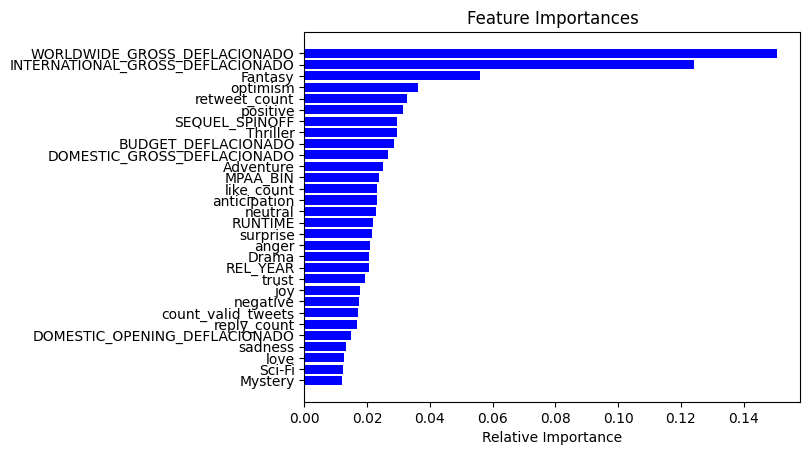

In [38]:
features = X.columns
importances = classificador_campeao.feature_importances_
indices = np.argsort(importances)

# customized number
num_features = 30

plt.title('Feature Importances')
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

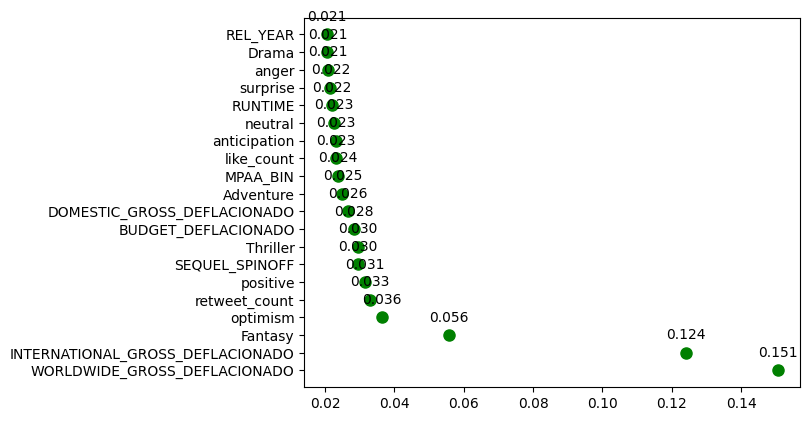

In [45]:
#fig, ax = plt.subplots()
import itertools
from operator import itemgetter

features = X.columns
importances = classificador_campeao.feature_importances_

teste = dict(zip(features, importances))

s = dict(sorted(teste.items(), key=lambda item: item[1], reverse = True)[:20])

#plt.clf()

# using some dummy data for this example
xs = list(s.values())
ys = list(s.keys())

# 'bo-' means blue color, round points, solid lines
plt.plot(xs,ys, marker='o', linestyle='', markersize=8, color='g')

# zip joins x and y coordinates in pairs
for x,y in zip(xs,ys):
    label = "{:.3f}".format(x)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()